## AQT Compile

In [1]:
import cirq
import cirq_superstaq
from cirq_superstaq import Service

In [2]:
service = Service(remote_host="https://127.0.0.1:5000", api_key="ya29.A0ARrdaM8oVba24A60a7G7Fipf-V6NUSjXIkYdvKI6Nq7ba5bWPqGjxiyZCY0p-VIDyPF7DQMeH9qzjc2FsPaJJzNzFsNfAdJ4eOw959OLBdi0-oWFauUhYitEsWN8UI7-yQaAE_UsSwQOSXY4TRVEEwyVzUJS6B0")

In [3]:
# Do this if you need to upload new configs:
res = service.aqt_upload_configs(
    "Pulses.yaml", "Variables.yaml"
)

/home/vtomole/cirq_superstaq_venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
service.aqt_save_configs("Pulses.yaml", "Variables.yaml")

## Single circuit compilation

In [3]:
qubits = cirq.LineQubit.range(8)

In [7]:
circuit1 = cirq.Circuit(cirq.H(qubits[4]), cirq_superstaq.ITOFFOLI(qubits[4], qubits[6], qubits[5]))
circuit1 = cirq.Circuit(cirq_superstaq.ITOFFOLI(qubits[4], qubits[6], qubits[5]))
print(circuit1)

4: ───@────
      │
5: ───iX───
      │
6: ───@────


In [8]:
compiler_output = service.aqt_compile(circuit1)

/home/vtomole/cirq_superstaq_venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print(compiler_output.circuit)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

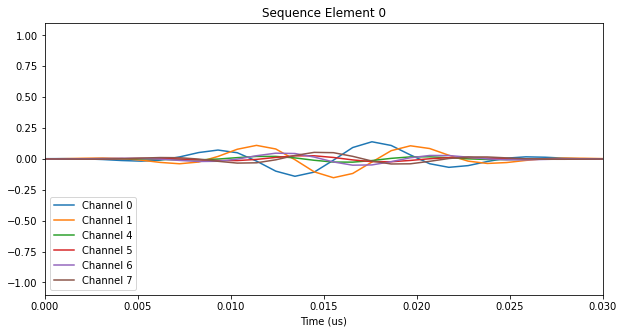

In [27]:
compiler_output.seq.plot(element=0)

## Multiple circuit compilation

In [15]:
circuit2 = cirq.Circuit()
circuit2 += cirq.SWAP(qubits[4], qubits[5])
circuit2 += cirq.H(qubits[6])
print(circuit2)

4: ───×───
      │
5: ───×───

6: ───H───


In [16]:
compiler_output = service.aqt_compile([circuit1, circuit2])

/home/vtomole/cirq_superstaq_venv/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [17]:
print(compiler_output.circuits[0])
print()
print(compiler_output.circuits[1])

4: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

4: ───────────────Rx(0.5π)──────────────@───Rz(π)──────Rx(0.5π)───Rz(π)──────@───────────────Rx(0.5π)──────────────@───Rz(1.5π)───
                                        │                                    │                                     │
5: ───Rz(-0.5π)───Rx(0.5π)───Rz(0.5π)───@───Rz(0.5π)───Rx(0.5π)───Rz(1.5π)───@───Rz(-0.5π)───Rx(0.5π)───Rz(0.5π)───@───Rz(0.5π)───

6: ───Rz(0.5π)────Rx(0.5π)───Rz(0.5π)─────────────────────────────────────────────────────────────────────────────────────────────


In [18]:
compiler_output.seq.plot(element=0)

AttributeError: 'NoneType' object has no attribute 'plot'

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 1'}, xlabel='Time (us)'>)

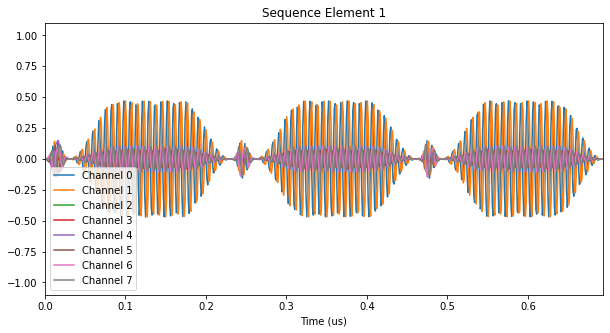

In [15]:
compiler_output.seq.plot(element=1)